In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib
import seaborn as sns  # Import Seaborn

In [64]:
gossipcop_fake_df = pd.read_csv('dataset/gossipcop_fake.csv')
gossipcop_real_df = pd.read_csv('dataset/gossipcop_real.csv')

politifact_fake_df = pd.read_csv('dataset/politifact_fake.csv')
politifact_real_df = pd.read_csv('dataset/politifact_real.csv')

In [65]:
fake_df = pd.concat([gossipcop_fake_df, politifact_fake_df])
true_df = pd.concat([gossipcop_real_df, politifact_real_df])

fake_df.index = [x for x in range(len(gossipcop_fake_df) + len(politifact_fake_df))]
true_df.index = [x for x in range(len(gossipcop_real_df) + len(politifact_real_df))]

In [66]:
# add labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# concat
df = pd.concat([true_df, fake_df])
display(df)


,id,news_url,title,tweet_ids,true
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...,1
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...,1
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...,1
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...,1
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...,1
...,...,...,...,...,...
5750,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...,0
5751,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...,0
5752,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...,0
5753,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...,0


In [67]:
# inspect length of news
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 23196
Max length of the titles: 53
Mean length of the titles: 11.161191584755992


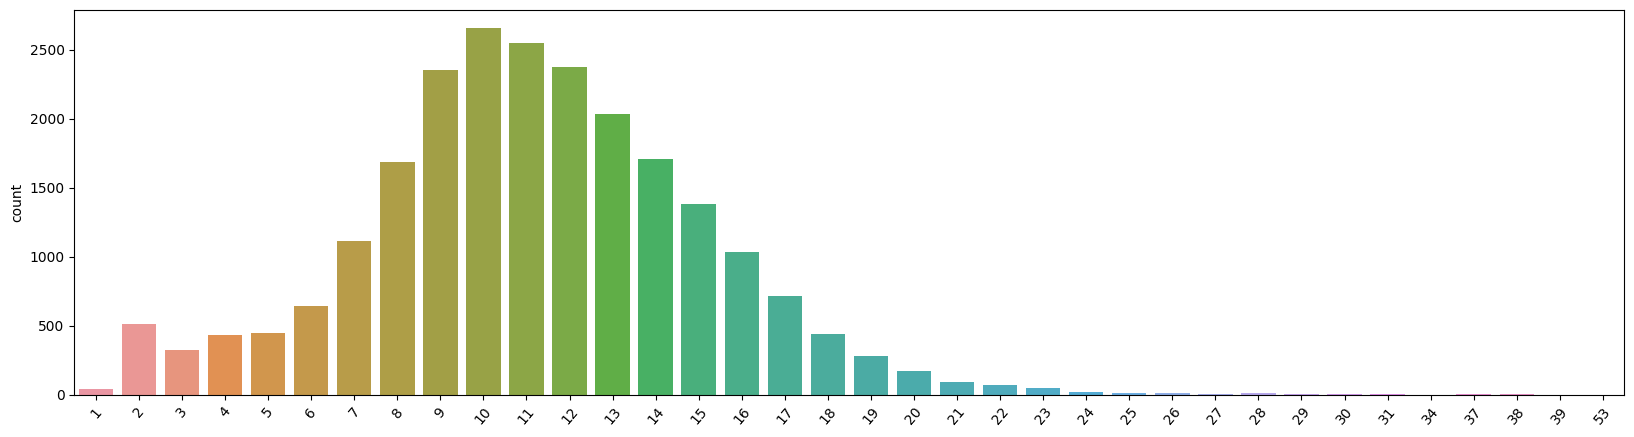

In [68]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [69]:
# purify and shuffle the DataFrame
from sklearn.utils import shuffle

# purify
df = df.iloc[:, [2,-1]]

# shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,'The Bold Type' sneak peek: Jane's first day b...,1
1,"Gwen Stefani Acting Like She’s Pregnant, Says ...",0
2,The One with the Rumor,0
3,Scheana Marie Gets Candid About Her Past Relat...,1
4,Tristan Thompson Benched in Playoff Game Amid ...,1
...,...,...
23191,Paul Walker's daughter settles with Porsche in...,1
23192,The Arrangement (2017) s02e09 Episode Script,1
23193,Harvard's famed Hasty Pudding troupe will cast...,1
23194,Inside the Golden Globes 2018 After Parties: H...,1


In [70]:
train_df = df.sample(frac=0.8)
val_df = df.drop(train_df.index)

# reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)

trainset size: (18557, 2)
valset size: (4639, 2)


In [71]:
# check for null titles
train_df['title'].isnull().sum()
val_df['title'].isnull().sum()

0

In [72]:
# DataFrame to csv
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)

In [73]:
train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')



In [74]:

# no null values in dataset
train_df['title'].isnull().sum()

0

In [75]:
val_df['title'].isnull().sum()

0

In [76]:
print('Train real news:', train_df[train_df['true']==1].shape[0])
print('Train fake news:', train_df[train_df['true']==0].shape[0])

print('Val real news:', val_df[val_df['true']==1].shape[0])
print('Val fake news:', val_df[val_df['true']==0].shape[0])

Train real news: 13961
Train fake news: 4596
Val real news: 3480
Val fake news: 1159


In [77]:
#sample real news
train_df[train_df['true']==1].sample(n=1)['title'].iloc[0]

'Former first lady Barbara Bush, wife and mother of presidents, dead at 92'

In [78]:
#sample fake news
train_df[train_df['true']==0].sample(n=1)['title'].iloc[0]

"Trump's Latest Order Bans Majority of Transgender Troops from Serving"

In [79]:
# word count in news
word_counts_train = train_df['title'].apply(lambda x: len(x.split()))
word_counts_train.describe()

count    18557.000000
mean        11.160101
std          3.967882
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         53.000000
Name: title, dtype: float64

In [80]:
word_counts_val = val_df['title'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    4639.000000
mean       11.165553
std         4.017127
min         1.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        38.000000
Name: title, dtype: float64

In [81]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...


In [82]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [83]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review)
    
    # stop word removal
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [84]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...


True

In [85]:
train_df['preprocessed_title'] = train_df['title'].apply(lambda review: data_preprocessing(review))
train_df

,title,true,preprocessed_title
0,Meghan Markle Was a Briefcase Model on ‘Deal o...,1,meghan markle briefcase model deal deal
1,2017 MTV Movie & TV Awards Winners: See The Fu...,1,2017 mtv movie tv award winner see full list
2,Fergie and Josh Duhamel split,0,fergie josh duhamel split
3,Jurassic World: Fallen Kingdom (2018),1,jurassic world fallen kingdom 2018
4,Meghan Markle Pens Emotional Essay About Being...,0,meghan markle pen emotional essay biracial act...
...,...,...,...
18552,Kim Kardashian’s New Nude Pics Are ‘Part Of A ...,0,kim kardashian new nude pic part sexy flirtati...
18553,"OBAMA CANCELED IT, TRUMP REINSTATED IT – A VER...",0,obama canceled trump reinstated sacred day back
18554,Tina Knowles Lawson Shades The Grammys After J...,1,tina knowles lawson shade grammys jay z winles...
18555,Selena Gomez wishes a happy birthday to 'super...,1,selena gomez wish happy birthday super cool ju...
